# BillBoard (EDA)

**INTRODUCTION**

Hello Everyone! How you doing? I Hope you all are doing good....

Here is my Exploratory Data Analysis(EDA) Project of DataScience

**CONTENT**

*  Data Reading
*  Data Cleaning
*  Data Manuipilating
*  EDA
*  Wordcloud of the song titles

*Package Importing*

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

*Data Reading*

In [35]:
data=pd.read_csv("/content/charts.csv")

In [36]:
data

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


In [37]:
data.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


*Stastical details*

In [38]:
data.describe()

,rank,last-week,peak-rank,weeks-on-board
count,330087.000000,297775.000000,330087.000000,330087.000000
mean,50.500929,47.591631,40.970629,9.161785
std,28.866094,28.054360,29.347481,7.618264
min,1.000000,1.000000,1.000000,1.000000
25%,26.000000,23.000000,13.000000,4.000000
50%,51.000000,47.000000,38.000000,7.000000
75%,76.000000,72.000000,65.000000,13.000000
max,100.000000,100.000000,100.000000,90.000000


*Checking Datatypes*

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


*Renaming columns*

In [40]:
data.rename(columns={"date":"Date","rank":"Rank","song":"Songs","artist":"Artists","last-week":"Last Week","peak-rank":"PeakRank","weeks-on-board":"WeeksOnBoard"},inplace=True)

In [41]:
data

,Date,Rank,Songs,Artists,Last Week,PeakRank,WeeksOnBoard
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


*Checking Null Values*

In [42]:
data.isna().sum()

Date                0
Rank                0
Songs               0
Artists             0
Last Week       32312
PeakRank            0
WeeksOnBoard        0
dtype: int64

In [43]:
data["Last Week"]=data["Last Week"].fillna(data["Last Week"].mean())
data.isna().sum()

Date            0
Rank            0
Songs           0
Artists         0
Last Week       0
PeakRank        0
WeeksOnBoard    0
dtype: int64

**Top Artists**

In [44]:
top_artists=data[data["Rank"]==1]
top_artists= top_artists.groupby("Artists").sum()
top_artists[["Rank"]].sort_values(by="Rank",ascending=True).head(10)

,Rank
Artists,
Love Unlimited Orchestra,1
Looking Glass,1
Londonbeat,1
Little Eva,1
Linda Ronstadt,1
Lil Nas X & Jack Harlow,1
Lil Nas X,1
Larry Verne,1
Lady Gaga & Bradley Cooper,1


In [70]:
top_songs=data[data["Rank"]==1]
top_songs=top_songs[["Songs","Artists"]].value_counts()
top_songs=top_songs.reset_index(name="Counts").head(20)
top_songs

,Songs,Artists,Counts
0,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,19
1,One Sweet Day,Mariah Carey & Boyz II Men,16
2,Despacito,Luis Fonsi & Daddy Yankee Featuring Justin Bieber,16
3,We Belong Together,Mariah Carey,14
4,I Will Always Love You,Whitney Houston,14
5,Uptown Funk!,Mark Ronson Featuring Bruno Mars,14
6,I'll Make Love To You,Boyz II Men,14
7,Candle In The Wind 1997/Something About The Wa...,Elton John,14
8,I Gotta Feeling,The Black Eyed Peas,14
9,Macarena (Bayside Boys Mix),Los Del Rio,14


**The songs which takes most number of first place**

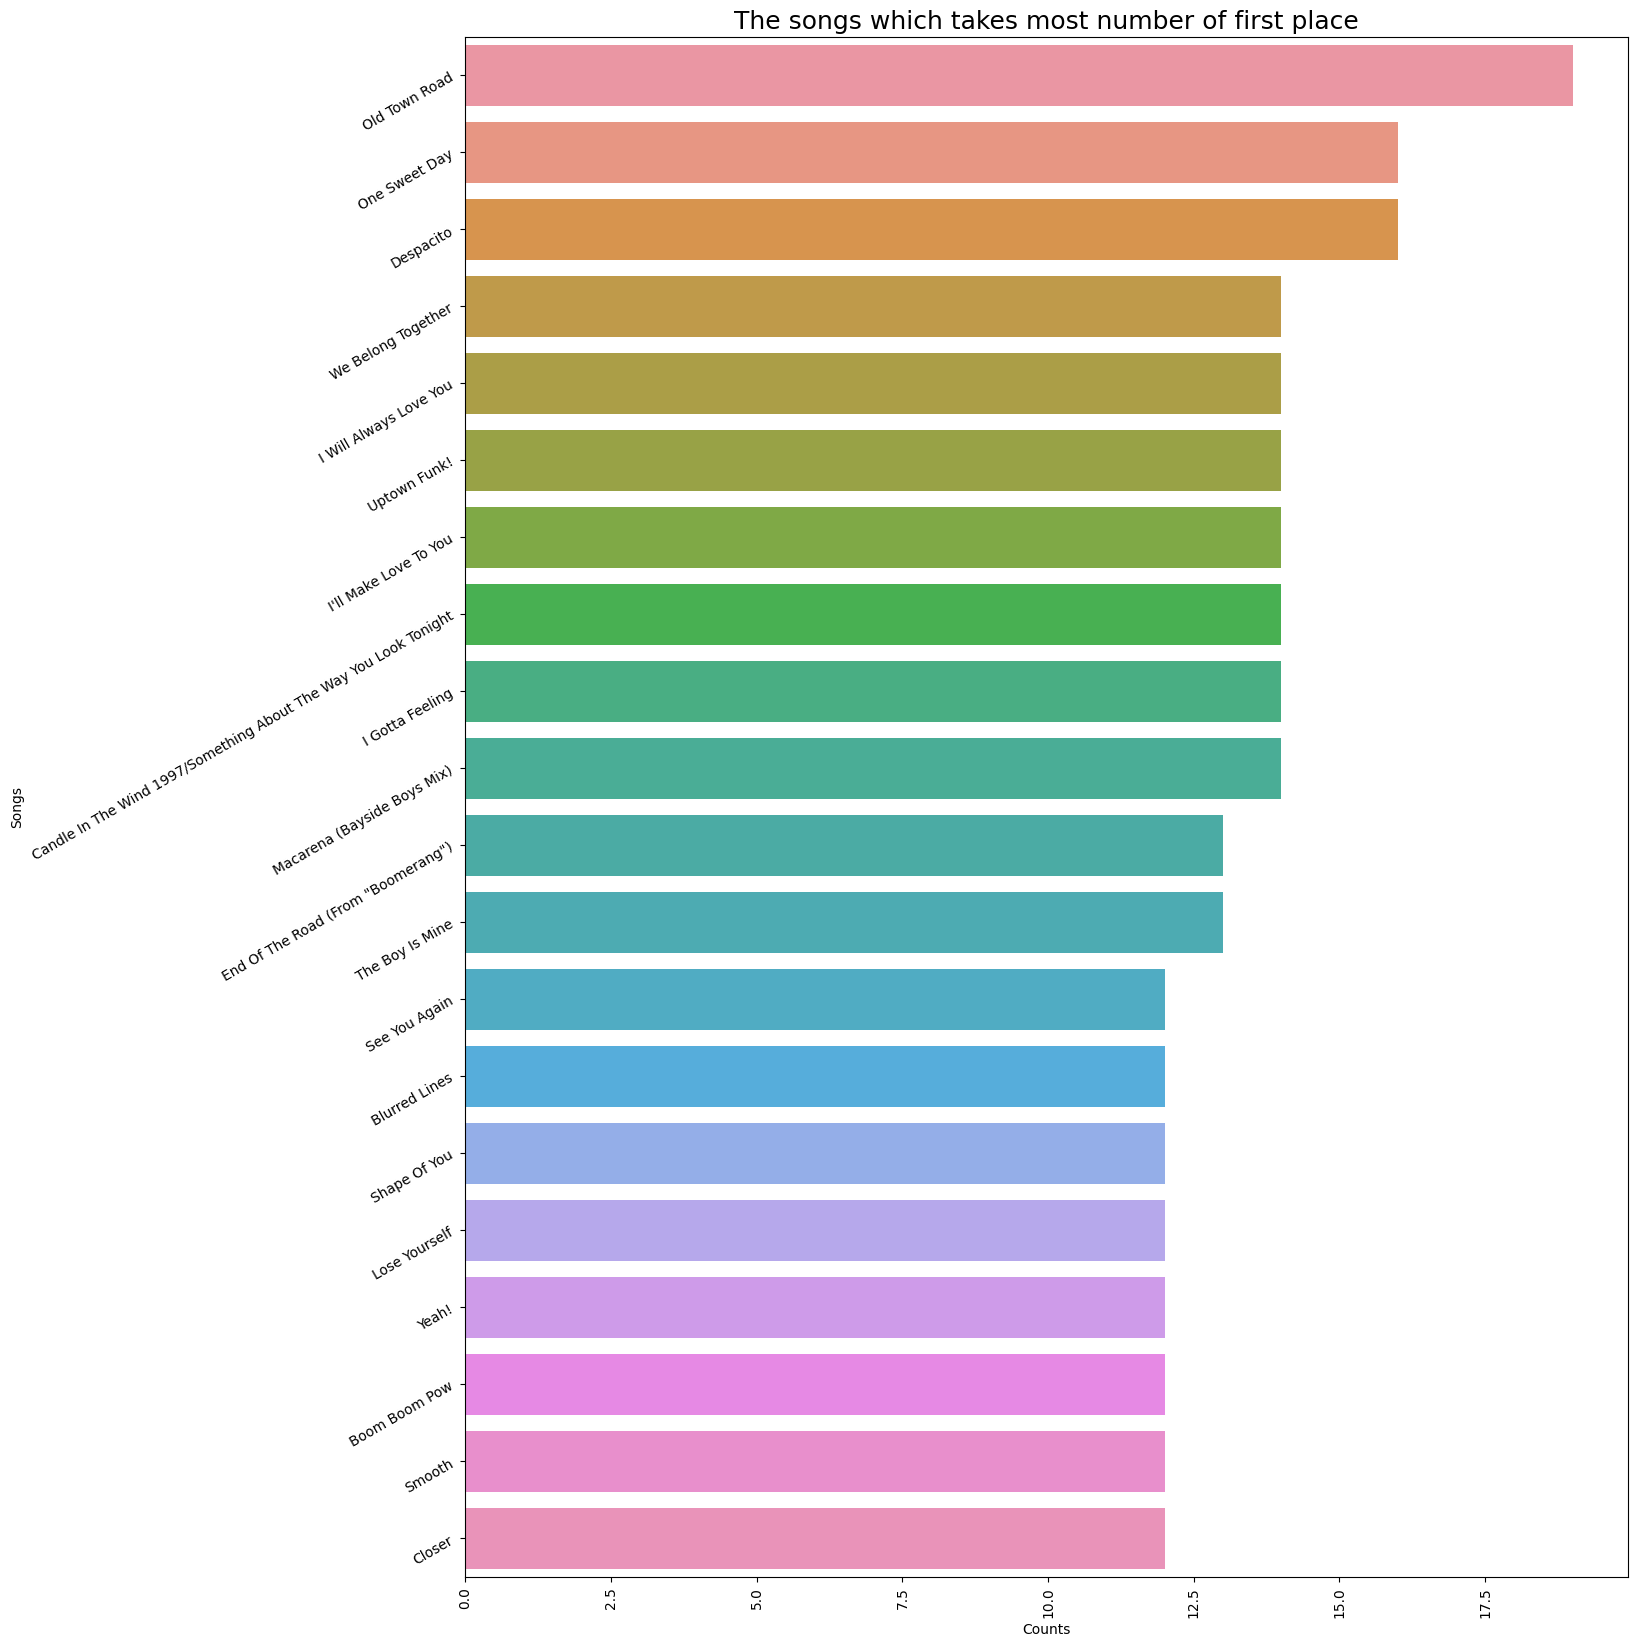

In [71]:
plt.figure(figsize=(15,20))
sns.barplot(data=top_songs,x="Counts",y="Songs")
plt.xticks(rotation=90)
plt.yticks(rotation=30)
plt.title("The songs which takes most number of first place",fontsize=18,loc="center")
plt.show()

**Who appeared on the chart most frequently ?**

In [47]:
df_artists= data["Artists"].value_counts().head(10)
df_artists

Taylor Swift     1023
Elton John        889
Madonna           857
Drake             787
Kenny Chesney     769
Tim McGraw        731
Keith Urban       673
Stevie Wonder     659
Rod Stewart       657
Mariah Carey      621
Name: Artists, dtype: int64

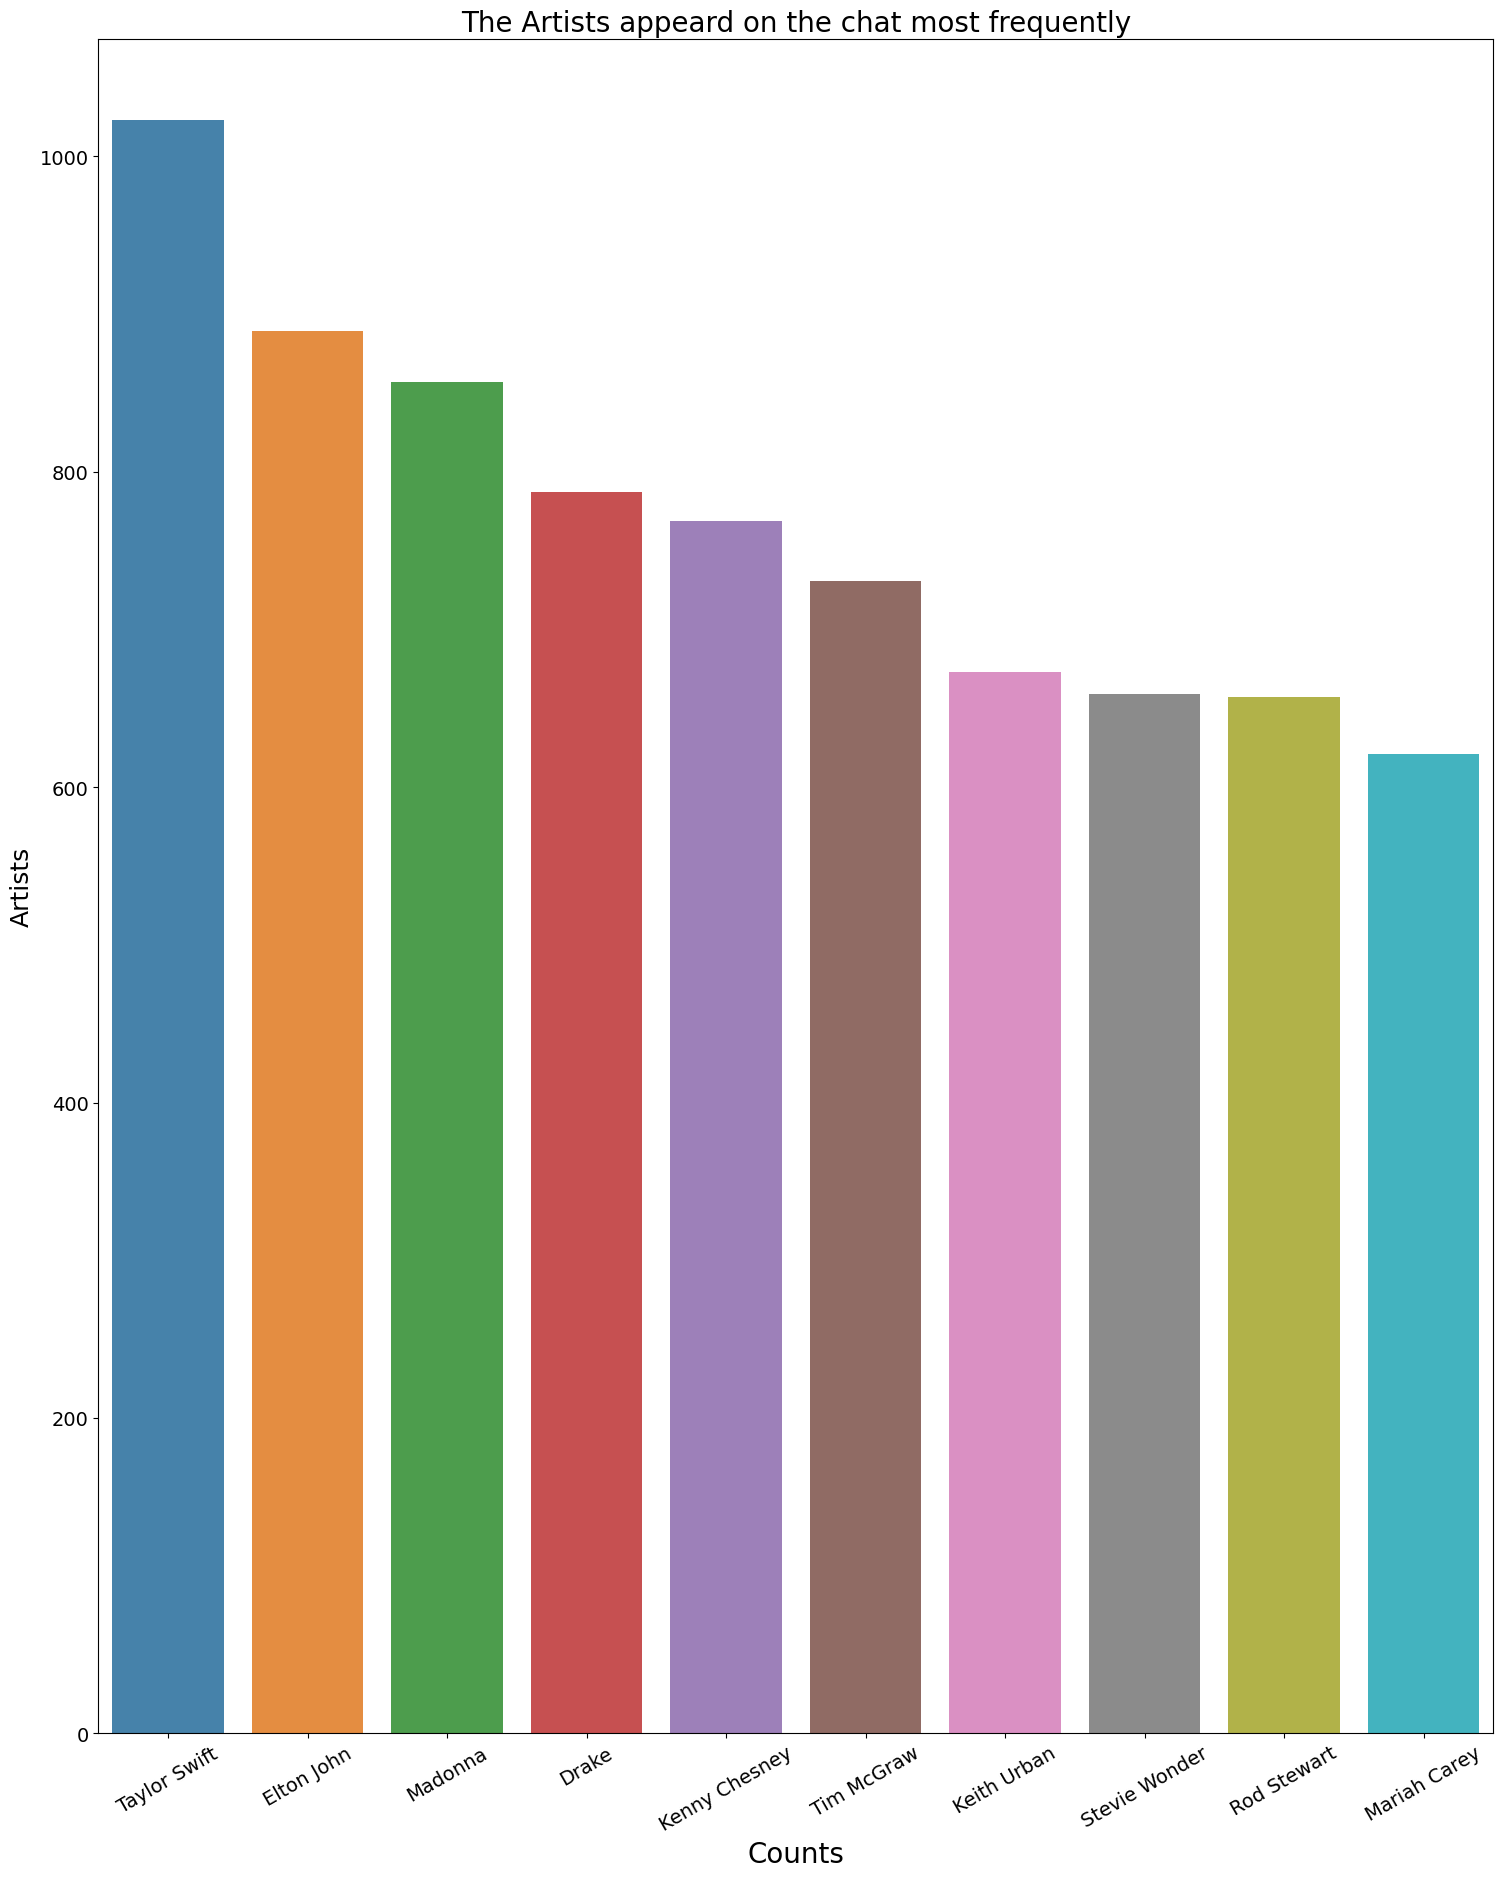

In [56]:
df_artists=df_artists[:10]
plt.figure(figsize=(18,22))
sns.barplot(x=df_artists.index,y=df_artists.values,alpha=0.9)
plt.title("The Artists appeard on the chat most frequently",fontsize=20)
plt.xlabel("Counts",fontsize=20)
plt.ylabel("Artists",fontsize=18)
plt.xticks(fontsize=14,rotation=30)
plt.yticks(fontsize=14)
plt.show()

**Which songs took the most number of first place?**

In [63]:
top_songs=data[data["Rank"]==1]
top_songs=top_songs[["Songs","Artists"]].value_counts()
top_songs.head(20)

Songs                                                             Artists                                          
Old Town Road                                                     Lil Nas X Featuring Billy Ray Cyrus                  19
One Sweet Day                                                     Mariah Carey & Boyz II Men                           16
Despacito                                                         Luis Fonsi & Daddy Yankee Featuring Justin Bieber    16
We Belong Together                                                Mariah Carey                                         14
I Will Always Love You                                            Whitney Houston                                      14
Uptown Funk!                                                      Mark Ronson Featuring Bruno Mars                     14
I'll Make Love To You                                             Boyz II Men                                          14
Candle In The Wind 1997/Someth

*Old Town Road is the top song which took the most number of first place.*

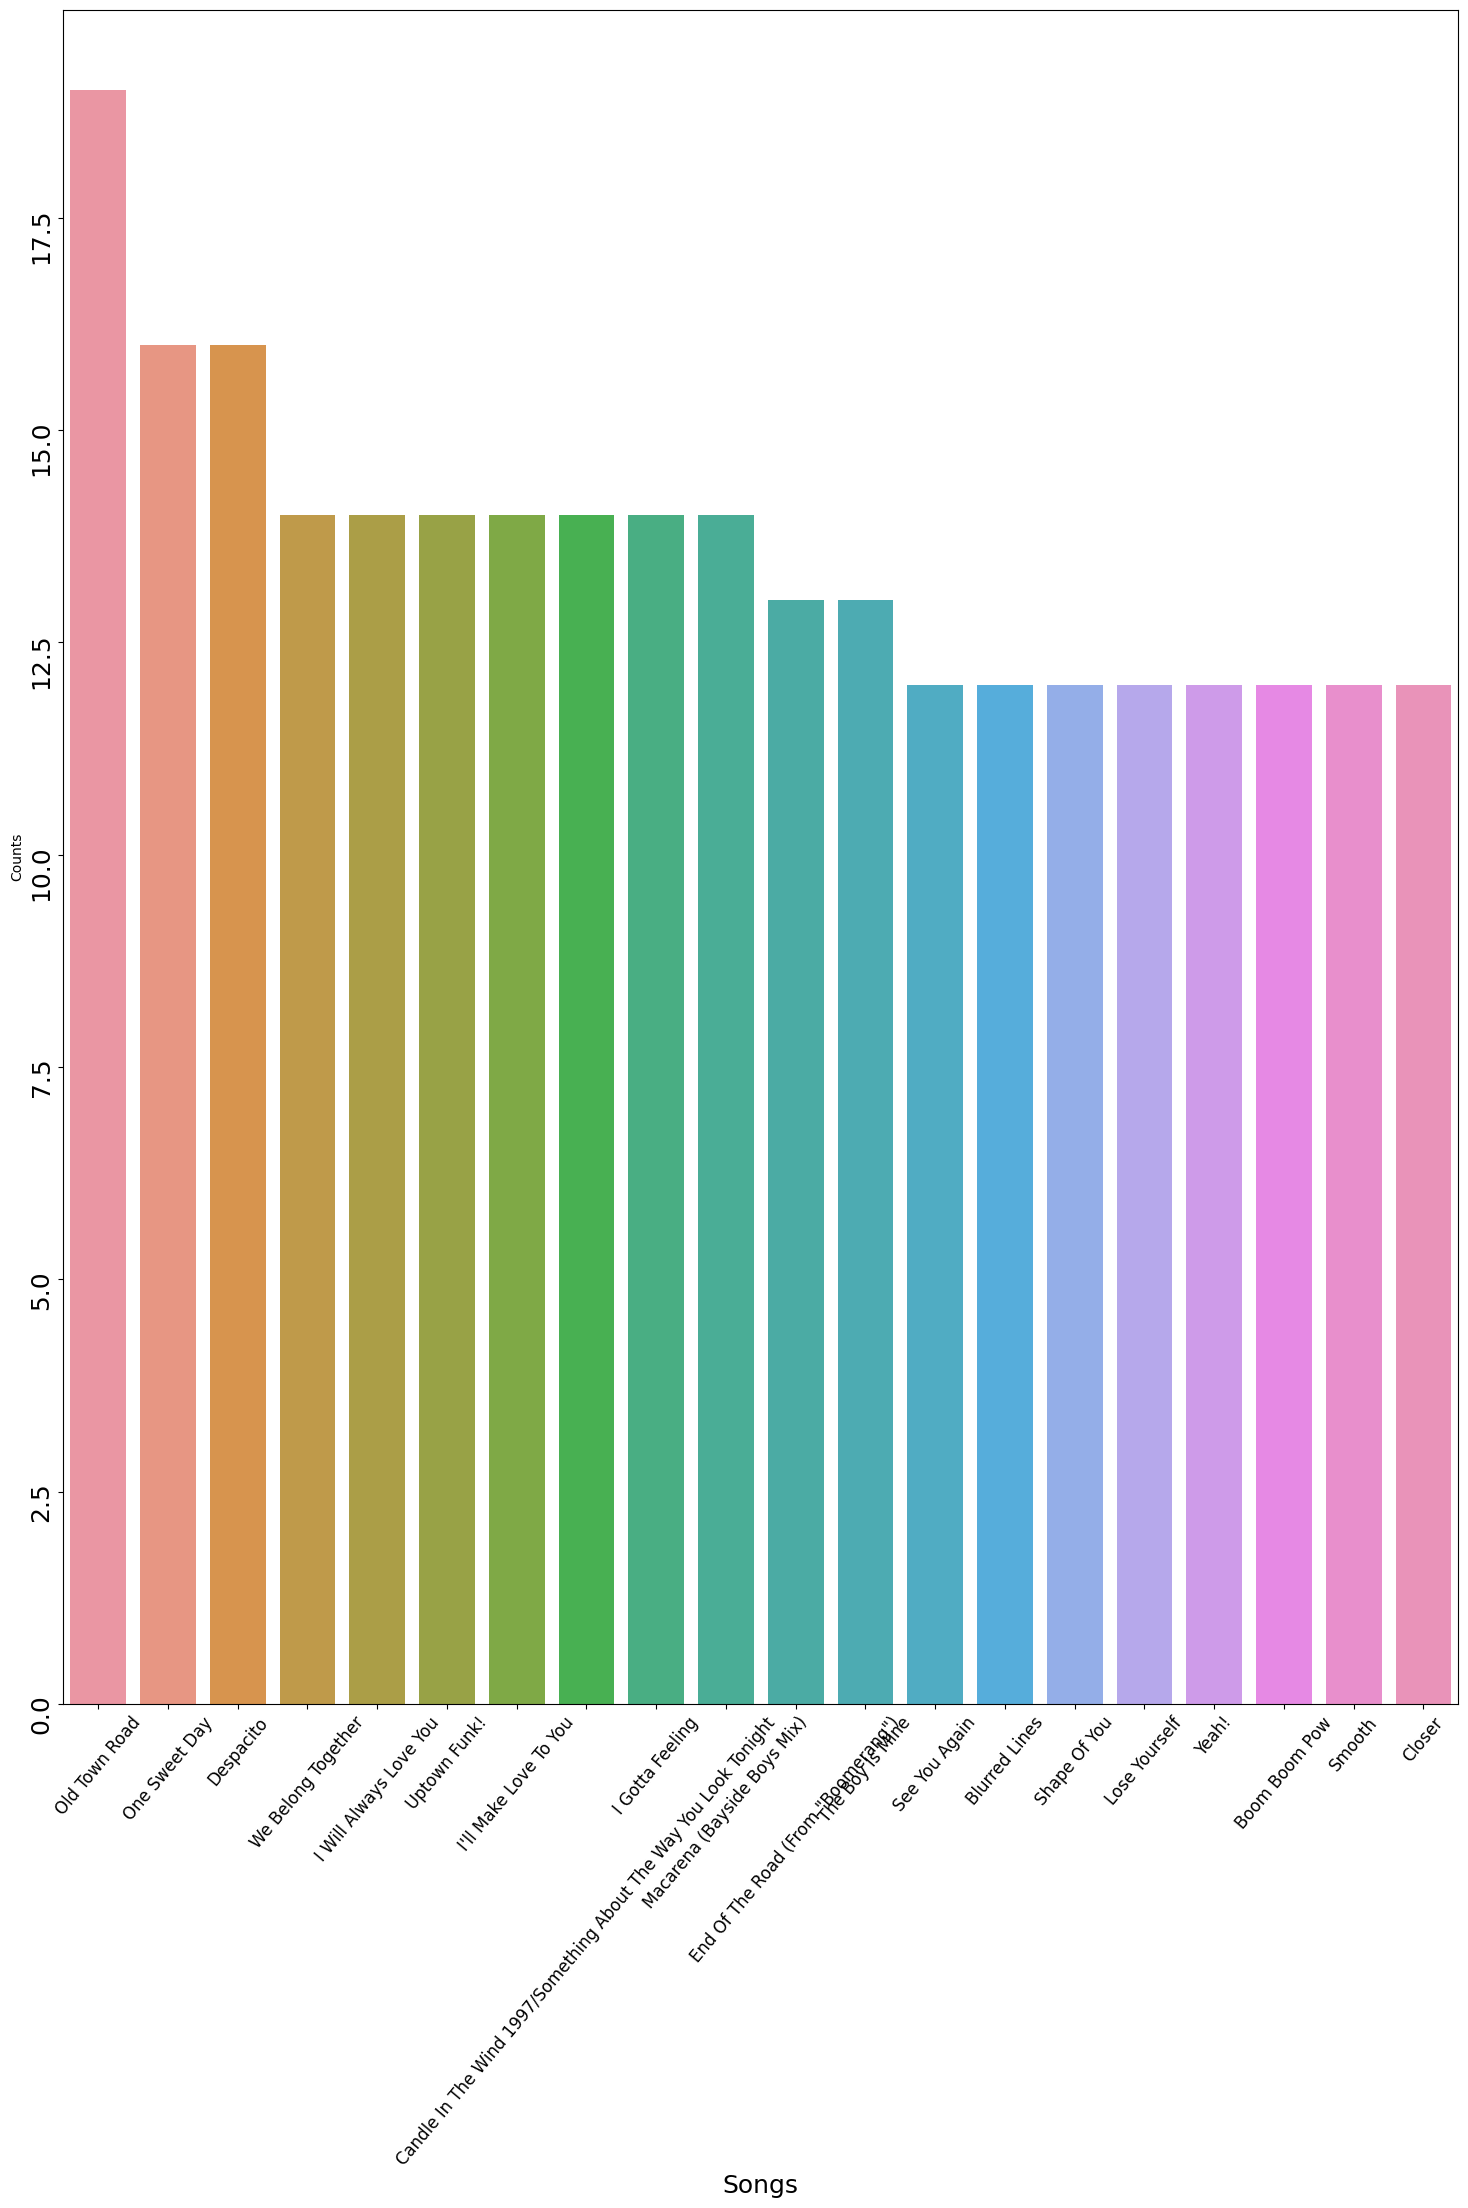

In [79]:
plt.figure(figsize=(18,22))
sns.barplot(data=top_songs,x="Songs",y="Counts")
plt.xlabel("Songs",fontsize=18)
plt.xticks(rotation=50,fontsize=12)
plt.yticks(rotation=90,fontsize=18)
plt.show()


**Wordcloud of the song titles**

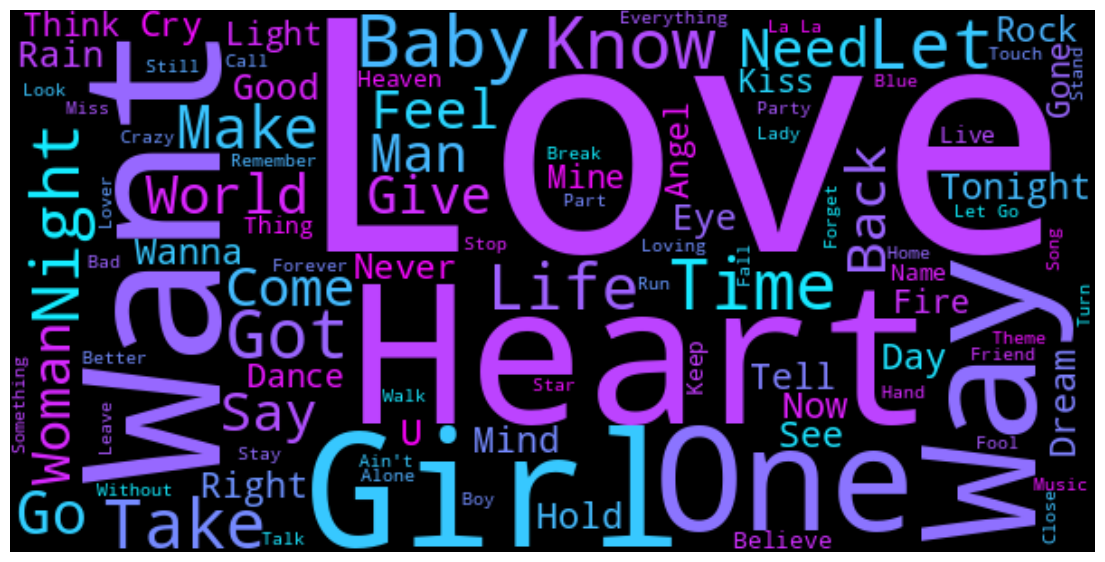

In [86]:
from PIL import Image as im
from wordcloud import WordCloud,STOPWORDS

plt.subplots(figsize=(14,10))
wc = WordCloud(max_words=100,
               stopwords=STOPWORDS, max_font_size=180,
               random_state=42, width=600, height=300, colormap='cool')
wc.generate(' '.join(data['Songs']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

*Love & heart... They are the most appeared words on the titles.❤*